In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [3]:
sys.path.append("..")

from WatChMaL.analysis.multi_plot_utils import multi_disp_learn_hist, multi_compute_roc, multi_plot_roc
from WatChMaL.analysis.comparison_utils import multi_get_masked_data, multi_collapse_test_output

In [4]:
# Defining the plotting parameters 
c = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Sets the color of the prop_cylce of the axes
label_dict = {"$\gamma$":0, "$e$":1} # Creates a dictionary for the labels
inverse_label_dict = {0:"$\gamma$", 1:"$e$"} # Inverts the dictionary created in the previous line  

In [5]:
# Define run locations

two_class_locs = ['/home/hlahiouel/WatChMaL/outputs/2021-04-01/07-31-14/outputs',
                  '/home/hlahiouel/WatChMaL/outputs/2021-04-01/08-10-18/outputs'
                 ]

two_class_titles = ['Short Tank Data - 2 Classes (e and gamma) - No Extra Data - 100 Epochs',
                    'Short Tank Data - 2 Classes (e and gamma) - Extra Data - 20 Epochs'
                   ]

training_locs = ['/home/hlahiouel/WatChMaL/outputs/2021-03-30/07-45-48/outputs/',
                 '/home/hlahiouel/WatChMaL/outputs/2021-03-24/10-49-21/outputs'
                ]

locs = two_class_locs
titles = two_class_titles 
linecolor = [c[0],c[1]]
linestyle = ['-','-'] 

In [6]:
softmax_2_class = [np.load(loc + "/softmax.npy") for loc in two_class_locs]
labels_2_class  = [np.load(loc + "/labels.npy") for loc in two_class_locs]
indices_2_class = [np.load(loc + "/indices.npy") for loc in two_class_locs]

i:  0
Found training logs:  ['/home/hlahiouel/WatChMaL/outputs/2021-03-30/07-45-48/outputs/log_train_0.csv']
i:  1
Found training logs:  ['/home/hlahiouel/WatChMaL/outputs/2021-03-24/10-49-21/outputs/log_train_0.csv']


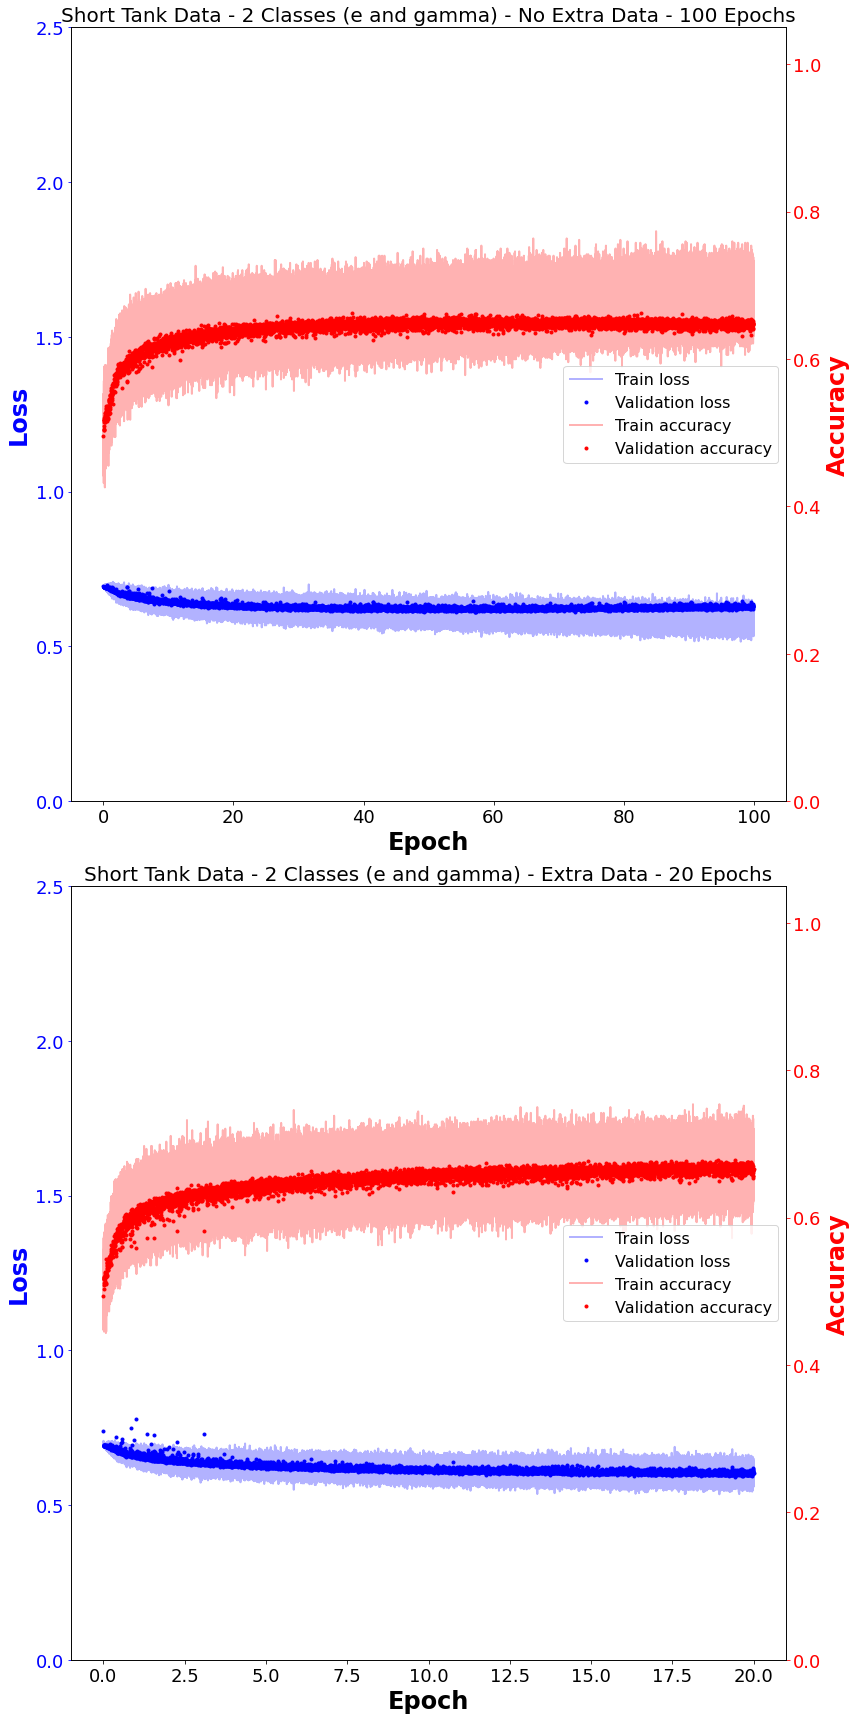

In [7]:
fig = multi_disp_learn_hist(training_locs,losslim=2.5,titles=titles,leg_font=15, title_font=15,xmax=100)

In [8]:
fprs, tprs, thrs = multi_compute_roc(softmax_2_class, labels_2_class, 
                                                      true_label=label_dict["$e$"], 
                                                      false_label=label_dict["$\gamma$"])

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection '}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


../WatChMaL/analysis/plot_utils.py:620: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:620: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])


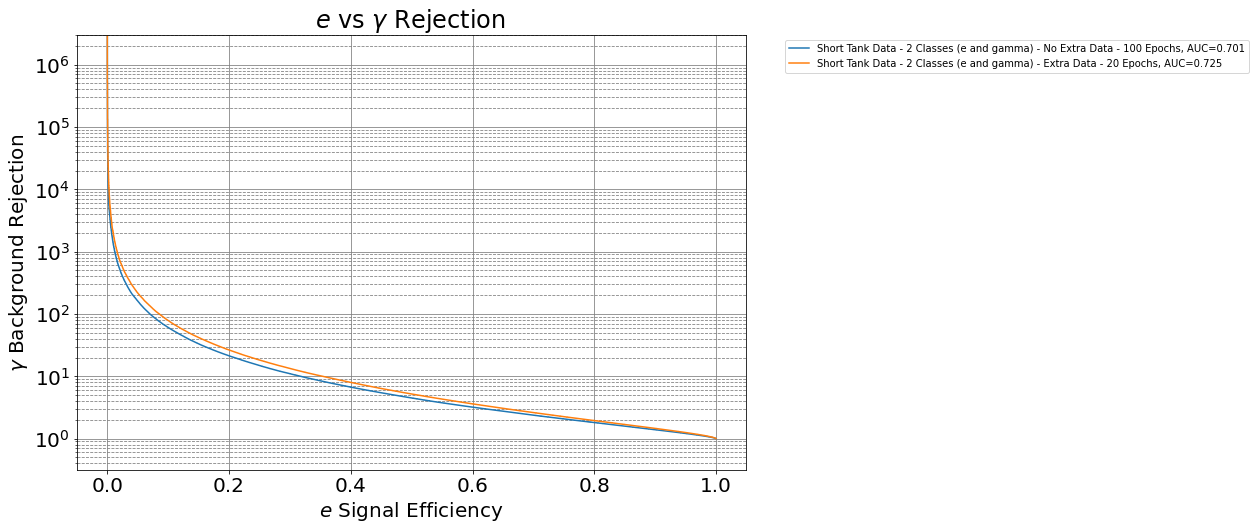

In [9]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1], ylims=[[0,3e6]], 
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection '}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


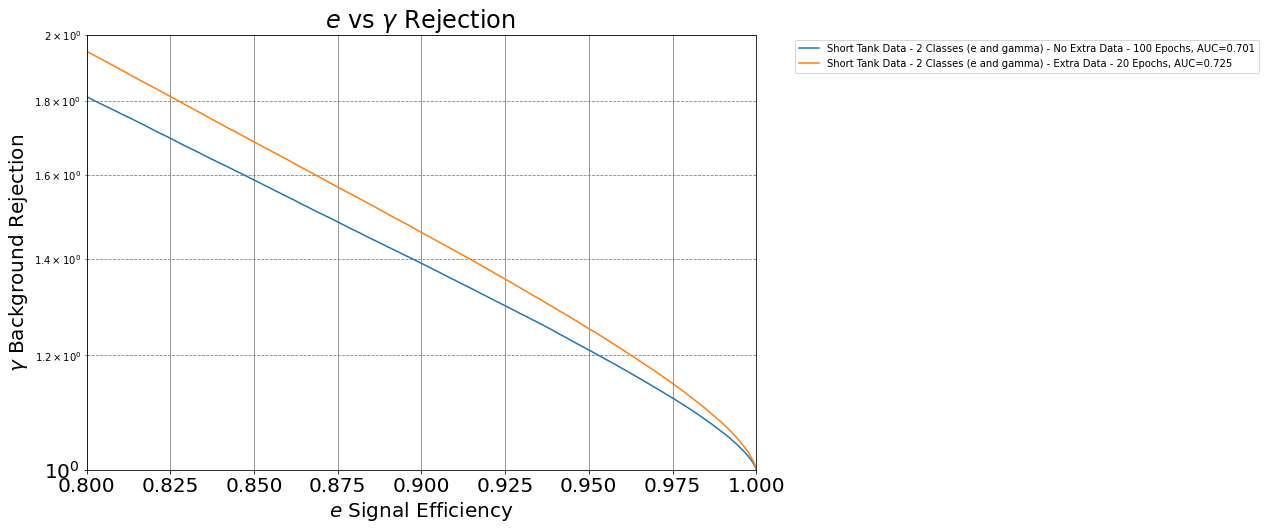

In [13]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1], xlims=[[0.8,1.0]],ylims=[[1e0,2e0]], 
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)